In [15]:
import json

with open('channel_messages.json', 'r') as f:
  s = f.read()



In [30]:
dialogue = []
s = s[1:]
s = s + '    '
while "ttl_period" in s:
  dialogue.append(s[1:(s.index("ttl_period") + 17)])
  s = s[(s.index("ttl_period") + 20):]


In [ ]:
# процентное соотношение сообщений от пользователей

import tqdm

den_id = '1804706738'
alia_id = ''

den_sum = 0
alia_sum = 0

for i in tqdm.tqdm(dialogue):
  if den_id not in i:
    den_sum += 1
  else:
    alia_sum += 1

print('Den wrote:', den_sum, 'messages.')
print('Alia wrote:', alia_sum, 'messages.')

print('In procent: Den -', den_sum / len(dialogue) * 100, ', Alia -', alia_sum / len(dialogue) * 100, '.')

In [94]:
# максимум сообщений за сутки
date = [] # даты
summa = [] # кол-во сообщений в день

for i in tqdm.tqdm(dialogue):
  data = i[(i.index('date') + 8):(i.index('date') + 18)]

  if data not in date:
    date.append(data)
    summa.append(1)
  else:
    summa[date.index(data)] += 1


print('\n')
print('Максимум сообщений за сутки:', max(summa))
print('Это было', date[summa.index(max(summa))])

print(summa[date.index('2024-01-01')])

100%|██████████| 111047/111047 [00:00<00:00, 164675.90it/s]



Максимум сообщений за сутки: 2253
Это было 2024-02-23
1626


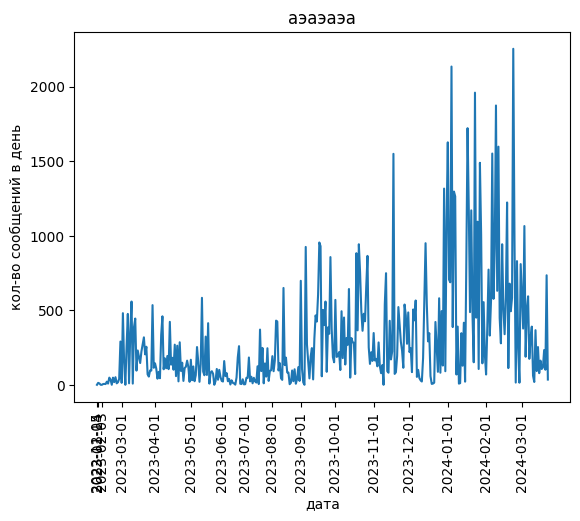

In [97]:
# график общения по дням за все время
import matplotlib.pyplot as plt

date = date[::-1] # только один раз, потом закомментить!!!!
summa = summa[::-1] # только один раз, потом закомментить!!!!

legend = []
months = []
for i in date:
  if i[:7] not in months:
    months.append(i[:7])
    legend.append(date.index(i))

plt.plot(date, summa)
plt.title('аэаэаэа')
plt.xlabel('дата')
plt.ylabel('кол-во сообщений в день')
plt.xticks(legend, rotation=90)
plt.show()

In [ ]:
# распределение по датам и личностям
date_1 = [] # даты
summa_1 = [] # кол-во сообщений в день
summa_alia = [] # кол-во сообщений в день

for i in tqdm.tqdm(dialogue):
  data = i[(i.index('date') + 8):(i.index('date') + 18)]

  if data not in date_1:
    if den_id in i:
      summa_1.append(1)
      summa_alia.append(0)
    else:
      summa_1.append(0)
      summa_alia.append(1)
    date_1.append(data)
  else:
    if den_id in i:
      summa_1[date_1.index(data)] += 1
    else:
      summa_alia[date_1.index(data)] += 1

0 1 2022-12-05


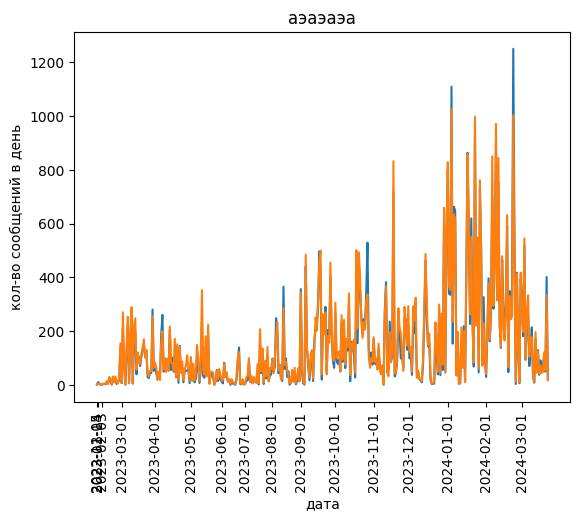

In [100]:
# график общения по дням за все время (но уже по отдельности)
import matplotlib.pyplot as plt

date_1 = date_1[::-1]  # только один раз, потом закомментить!!!!
summa_1 = summa_1[::-1] # только один раз, потом закомментить!!!!
summa_alia = summa_alia[::-1] # только один раз, потом закомментить!!!!

legend = []
months = []
for i in date_1:
  if i[:7] not in months:
    months.append(i[:7])
    legend.append(date.index(i))
print(summa_alia[0], summa_1[0], date_1[0])
plt.plot(date_1, summa_alia, date_1, summa_1) # поменять местами summa_1 и summa_alia если надо наложить графики наоборот
plt.title('аэаэаэа')
plt.xlabel('дата')
plt.ylabel('кол-во сообщений в день')
plt.xticks(legend, rotation=90)
plt.show()

In [103]:
# удаление ненужных тегов, оставляем только текстовые сообщения
messages = []

for i in dialogue:
  if 'message' in i:
    start_index = i.index('message') + 11
    # print(1)
    end_index = i[start_index:].index('"') + start_index
    messages.append(i[start_index:end_index])

In [111]:
import re
words = []
kolvos = []
for i in messages:
  i = re.sub(r'[^\w\s]', '', i)
  split_words = list(i.split(' ')) # удаление знаков препинания
  for j in split_words:
    j = j.lower()
    if j not in words:
      words.append(j)
      kolvos.append(1)
    else:
      kolvos[words.index(j)] += 1



In [ ]:
# топ использованных в диалоге слов
from heapq import nlargest

res = nlargest(100, kolvos)

for i in res:
  print(words[kolvos.index(i)], '-', i, 'раз было использовано.')


In [ ]:
# общее кол-во слов
summ = 0
for i in kolvos:
  summ += i

print('всего в диалоге', summ, 'слов.')